### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
import pandas as pd
import os
dataset = pd.DataFrame(columns=['Text','Language'])
for filename in os.listdir('/kaggle/input/lang-data'):
    f = os.path.join('/kaggle/input/lang-data', filename)
    if 'csv' in filename:
        if 'sentences' not in filename:
            df1 = pd.read_csv(f)
            if 'language' in df1.columns:
                df1=df1.rename(columns={'language':'Language'})
            dataset = pd.concat([dataset,df1],axis=0)  

In [3]:
dataset.shape

(45490, 2)

In [4]:
dataset.Language.replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

In [5]:
dataset['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portuguese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Swedish', 'Arabic', 'German', 'Kannada', 'Darija',
       'Estonian', 'Thai', 'Japanese', 'Latin', 'Urdu', 'Indonesian',
       'Portugese', 'Chinese', 'Korean', 'Pushto', 'Persian', 'Romanian'],
      dtype=object)

In [6]:
dataset.shape

(45490, 2)

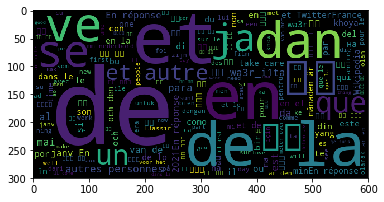

In [7]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wc = WordCloud(width=600,height=300,random_state=42).generate(' '.join(dataset.Text))
plt.imshow(wc);

In [8]:
sizes = []
for lang in dataset['Language'].unique():
    temp = dataset[dataset['Language']== lang]
    sizes.append(temp.shape[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8761dff240>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8761dffe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8761dff0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8761e36630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8761e36be0>],
 'means': []}

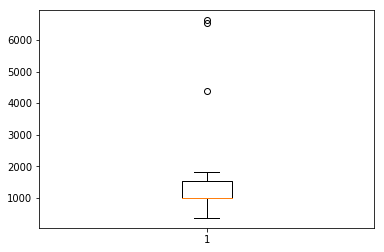

In [9]:
plt.boxplot(sizes)

In [10]:
count = 0
for i in sizes:
    if i > 1000:
        count = count+1
        print(i)
print(count)

6624
1063
1469
6544
1546
1819
1692
1474
1676
1536
4384
11


In [11]:
lan = []
for lang in dataset['Language'].unique():
    temp = dataset[dataset['Language']== lang]
    if temp.shape[0] > 1000:
        print(lang)
        lan.append(lang)

English
Hindi
Tamil
French
Dutch
Spanish
Russian
Turkish
Swedish
Arabic
Darija


In [12]:
#lang = ['English','Hindi','Tamil','French','Dutch','Spanish','Russian','Turkish','Swedish','Arabic','Darija']
dataset = dataset[dataset['Language'].isin(lan)]

In [13]:
# data = pd.read_csv('/kaggle/input/lang-data/sentences.csv')
# data.shape

In [14]:
# import json
# with open('/kaggle/input/lang-data-json/lan_to_language.json', 'r') as f:
#     js_file = json.load(f)

In [15]:
#data['lan_code'] = data['lan_code'].map(js_file).fillna(data['lan_code'])

In [16]:
#data['lan_code'].unique()

In [17]:
# lang=[]
# for i in data['lan_code'].unique():
#     if 1000 <= df[df['Language']==i].shape[0]:
#         #print(df[df['Language']==i])
#         lang.append(i)

In [18]:
dataset.shape

(29827, 2)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

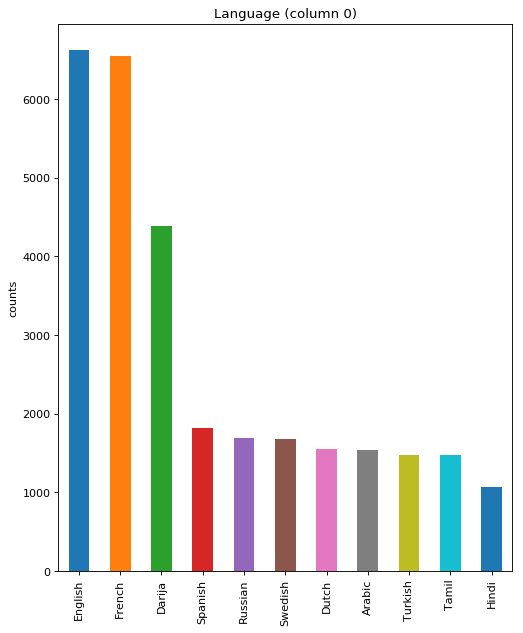

In [20]:
plotPerColumnDistribution(dataset, 10, 5)

In [21]:
dataset.shape

(29827, 2)

### Seperate features and target

In [22]:
#split the data into train and test set
from sklearn.model_selection         import train_test_split
text = dataset.Text
language = dataset.Language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [23]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  23861
lenght of test data =  5966


### Feature Extraction
The features were extracted using sklearn CountVectorizer

In [24]:
from sklearn.feature_extraction.text import*
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [25]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(23861, 1000)

In [26]:
#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [27]:
#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [28]:
#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [29]:
#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [30]:
#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

In [31]:
#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

In [32]:
#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

In [33]:
#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

In [34]:
#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

In [35]:
#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [36]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()

In [37]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,0,000,1,10,100,11,12,13,14,15,16,17,18,19,1hen,2,20,2020en,2021,2021en,2022,21,22,23,24,25,26,27,28,29,2hen,3,30,31,3hen,4,4hen,5,5hen,6,...,பயனபட,பல,ம,மககள,மன,மப,மறற,மல,ய,யத,யதத,யம,யர,யல,ர,ரகள,ரத,ரதத,ரநத,ரம,ரவ,ற,றக,றத,றற,ல,லதத,லம,லல,ள,ளள,ளளத,ழ,வ,வக,வட,வத,வர,ஸ,茶葉
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,33,0,0,1,2,8,10,0,0,0,0,0,11,0,0,0,1,1,0,5,4,2,0,16,3,0,4,1,0,2,0,19,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

### Applying RandomForestClassifier on train dataset

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

### Applying NaiveBayes on train dataset

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb_uni = MultinomialNB()                      
nb_uni.fit(uni_train_features, train_labels);

nb_bi = MultinomialNB()                      
nb_bi.fit(bi_train_features, train_labels);

nb_tri = MultinomialNB()                      
nb_tri.fit(tri_train_features, train_labels);

nb_char3 = MultinomialNB()                    
nb_char3.fit(char3_train_features, train_labels);

nb_char4 = MultinomialNB()                     
nb_char4.fit(char4_train_features, train_labels);

nb_char5 = MultinomialNB()                    
nb_char5.fit(char5_train_features, train_labels);

nb_char6 = MultinomialNB()                     
nb_char6.fit(char6_train_features, train_labels);

nb_char7 = MultinomialNB()                     
nb_char7.fit(char7_train_features, train_labels);

nb_char8 = MultinomialNB()                     
nb_char8.fit(char8_train_features, train_labels);

nb_char9 = MultinomialNB()                     
nb_char9.fit(char9_train_features, train_labels);

nb_char10 = MultinomialNB()                     
nb_char10.fit(char10_train_features, train_labels);

### Applying LinearSVC() on train dataset

In [41]:
from sklearn.svm import LinearSVC

lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Applying LogisticRegression() on train dataset

In [42]:
from sklearn.linear_model import LogisticRegression

lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);

## Testing

In [43]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

,0,000,1,10,100,11,12,13,14,15,16,17,18,19,1hen,2,20,2020en,2021,2021en,2022,21,22,23,24,25,26,27,28,29,2hen,3,30,31,3hen,4,4hen,5,5hen,6,...,பயனபட,பல,ம,மககள,மன,மப,மறற,மல,ய,யத,யதத,யம,யர,யல,ர,ரகள,ரத,ரதத,ரநத,ரம,ரவ,ற,றக,றத,றற,ல,லதத,லம,லல,ள,ளள,ளளத,ழ,வ,வக,வட,வத,வர,ஸ,茶葉
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,36,0,0,0,1,0,20,0,0,0,0,0,4,0,0,0,1,0,1,8,0,0,0,15,0,0,4,7,1,0,5,12,0,0,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [45]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [46]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [47]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [48]:
char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

In [49]:
char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

In [50]:
char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

In [51]:
char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

In [52]:
char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

In [53]:
char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

### Evaluating using Test Data

In [54]:
from sklearn.metrics import accuracy_score

#### Random forest Classififier

In [55]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)     
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)       

predictions_bi_rfc = rfc_bi.predict(bi_test_features)        
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)  

predictions_tri_rfc = rfc_tri.predict(tri_test_features)   
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc) 

predictions_char3_rfc = rfc_char3.predict(char3_test_features)   
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc) 

predictions_char4_rfc = rfc_char4.predict(char4_test_features)   
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)    

predictions_char5_rfc = rfc_char5.predict(char5_test_features)    
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)    

predictions_char6_rfc = rfc_char6.predict(char6_test_features)   
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)       

predictions_char7_rfc = rfc_char7.predict(char7_test_features) 
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)    

predictions_char8_rfc = rfc_char8.predict(char8_test_features)     
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)     

predictions_char9_rfc = rfc_char9.predict(char9_test_features)      
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)        

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)         

#### Naive Bayes

In [56]:
predictions_uni_nb= nb_uni.predict(uni_test_features)         
uni_nb = accuracy_score(test_labels, predictions_uni_nb)          

predictions_bi_nb= nb_bi.predict(bi_test_features)         
bi_nb = accuracy_score(test_labels, predictions_bi_nb)          

predictions_tri_nb = nb_tri.predict(tri_test_features)  
tri_nb = accuracy_score(test_labels, predictions_tri_nb) 

predictions_char3_nb = nb_char3.predict(char3_test_features)         
char3_nb = accuracy_score(test_labels, predictions_char3_nb) 

predictions_char4_nb = nb_char4.predict(char4_test_features)         
char4_nb = accuracy_score(test_labels, predictions_char4_nb)      

predictions_char5_nb = nb_char5.predict(char5_test_features)        
char5_nb = accuracy_score(test_labels, predictions_char5_nb)    

predictions_char6_nb = nb_char6.predict(char6_test_features)       
char6_nb = accuracy_score(test_labels, predictions_char6_nb)    

predictions_char7_nb = nb_char7.predict(char7_test_features)        
char7_nb = accuracy_score(test_labels, predictions_char7_nb)       

predictions_char8_nb = nb_char8.predict(char8_test_features)         
char8_nb = accuracy_score(test_labels, predictions_char8_nb)      

predictions_char9_nb = nb_char9.predict(char9_test_features)      
char9_nb = accuracy_score(test_labels, predictions_char9_nb)    

predictions_char10_nb = nb_char10.predict(char10_test_features)      
char10_nb = accuracy_score(test_labels, predictions_char10_nb)    

#### LinearSVC

In [57]:
predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)          

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)        
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)          

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)  
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc) 

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc) 

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)      

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)        
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)    

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)       
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)    

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)        
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)       

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)      

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)      
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)    

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)      
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)    

#### Logistic Regression

In [58]:
predictions_uni_lr = lr_uni.predict(uni_test_features)         
uni_lr = accuracy_score(test_labels, predictions_uni_lr)     

predictions_bi_lr = lr_bi.predict(bi_test_features)    
bi_lr = accuracy_score(test_labels, predictions_bi_lr)    

predictions_tri_lr = lr_tri.predict(tri_test_features)   
tri_lr = accuracy_score(test_labels, predictions_tri_lr) 

predictions_char3_lr = lr_char3.predict(char3_test_features)     
char3_lr = accuracy_score(test_labels, predictions_char3_lr) 

predictions_char4_lr = lr_char4.predict(char4_test_features)     
char4_lr = accuracy_score(test_labels, predictions_char4_lr)    

predictions_char5_lr = lr_char5.predict(char5_test_features)  
char5_lr = accuracy_score(test_labels, predictions_char5_lr)  

predictions_char6_lr = lr_char6.predict(char6_test_features)     
char6_lr = accuracy_score(test_labels, predictions_char6_lr)   

predictions_char7_lr = lr_char7.predict(char7_test_features)       
char7_lr = accuracy_score(test_labels, predictions_char7_lr)     

predictions_char8_lr = lr_char8.predict(char8_test_features)        
char8_lr = accuracy_score(test_labels, predictions_char8_lr)      

predictions_char9_lr = lr_char9.predict(char9_test_features)     
char9_lr = accuracy_score(test_labels, predictions_char9_lr)      

predictions_char10_lr = lr_char10.predict(char10_test_features)     
char10_lr = accuracy_score(test_labels, predictions_char10_lr)         

### Selection of Best Model


In [59]:
!pip install prettytable

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ","    Naive Bayes    ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2), round(uni_nb, 2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2), round(bi_nb, 2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2), round(tri_nb, 2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2), round(char3_nb, 2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2), round(char4_nb, 2),round(char4_lsvc,2),round(char4_lr,2)])
Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2), round(char5_nb, 2),round(char5_lsvc,2),round(char5_lr,2)])
Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2), round(char6_nb, 2),round(char6_lsvc,2),round(char6_lr,2)])
Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2), round(char7_nb, 2),round(char7_lsvc,2),round(char7_lr,2)])
Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2), round(char8_nb, 2),round(char8_lsvc,2),round(char8_lr,2)])
Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2), round(char9_nb, 2),round(char9_lsvc,2),round(char9_lr,2)])
Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_nb, 2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+------------------+---------------------------------+---------------------+------------------------+---------------------------+
|                  |    Random forest Classififier   |     Naive Bayes     |      Linear SVC        |    Logistic Regression    |
+------------------+---------------------------------+---------------------+------------------------+---------------------------+
|     Uni Gram     |               0.97              |         0.96        |          0.97          |            0.98           |
|     Bi Gram      |               0.74              |         0.71        |          0.74          |            0.72           |
|     Tri Gram     |               0.55              |         0.46        |          0.55          |            0.54           |
|   3 Char Gram    |               0.97              |         0.96        |          0.98          |            0.98           |
|   4 Char Gram    |               0.96              |

In [70]:

Best_Model = PrettyTable()
Best_Model.field_names = [" ", "   Random forest Classififier  ", "     Naive Bayes   ", "     Linear SVC          ","   Logistic Regression   "]
Best_Model.add_row(["  Uni Gram  ", round(uni_rfc,2), round(uni_nb,2) ,round(uni_lsvc,2),round(uni_lr,2)])
Best_Model.add_row(["  3 Char Gram  ", round(char3_rfc,2), round(char3_nb,2),round(char3_lsvc,2),round(char3_lr,2)])
Best_Model.add_row(["  4 Char Gram  ", round(char4_rfc,2), round(char4_nb,2),round(char4_lsvc,2),round(char4_lr,2)])
Best_Model.add_row(["  5 Char Gram  ", round(char5_rfc,2), round(char5_nb,2),round(char5_lsvc,2),round(char5_lr,2)])
Best_Model.add_row(["  8 Char Gram  ", round(char8_rfc,2), round(char8_nb,2),round(char8_lsvc,2),round(char8_lr,2)])
print("Best Model")
print(Best_Model)

Best Model
+-----------------+---------------------------------+---------------------+---------------------------+---------------------------+
|                 |    Random forest Classififier   |      Naive Bayes    |      Linear SVC           |    Logistic Regression    |
+-----------------+---------------------------------+---------------------+---------------------------+---------------------------+
|     Uni Gram    |               0.97              |         0.96        |            0.97           |            0.98           |
|   3 Char Gram   |               0.97              |         0.96        |            0.98           |            0.98           |
|   4 Char Gram   |               0.96              |         0.92        |            0.95           |            0.96           |
|   5 Char Gram   |               0.93              |         0.92        |            0.93           |            0.94           |
|   8 Char Gram   |               0.92              |         0.8

## Application Phase

#### Combine Data (Train + Test )

In [62]:
features = uni_vector.transform(dataset.Text)
target=language

In [63]:
model=lr_uni.fit(features, target);

In [64]:
# import pickle
# filename = 'unigram_model.sav'
# pickle.dump(model, open(filename, 'wb'))

### Make prediction on unseen/new data

In [65]:
# # load the model from disk
# model = pickle.load(open(filename, 'rb'))

#### Input from User

In [71]:
# comment =input("please enter a text paragraph: \n")

#comment = 'عدم عل عُقر ويتّفق ارتكبها. شعار سقطت وفي ٣٠, ذات بالفشل ومحاولة والمعدات هو. بينما الأسيوي بريطانيا-فرنسا تحت بل, انه أسيا تحرّكت واندونيسيا، كل. مع الإنزال الأسيوي ضرب.'
comment = 'सभी मनुष्यों को गौरव और अधिकारों के मामले में जन्मजात स्वतन्त्रता और समानता प्राप्त है। उन्हें बुद्धि और अन्तरात्मा की देन प्राप्त है और परस्पर उन्हें भाईचारे के भाव से बर्ताव करना चाहिये।'

#### Convert User Input into Feature Vector

In [72]:
user_input= uni_vector.transform([comment])
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)

#### Applying to Trained Model

In [73]:
language = model.predict(user_input)  

In [74]:
a=[language[i] for i in [0]]
print("Language : ",a)

Language :  ['Hindi']
